## Poissson Autoregression model fitting

This notebook contains the fitting of the Poisson Autorregression to each series in the dataset, generating an unique object to forecast with all independent models at the same time.

In [1]:
import os
import sys
import pickle
import pandas as pd

src_path = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(src_path)

from PoissonAutoregression.PoissonAutoregression import MultivariatePoissonAutorregresion
from DataSimulation.utils import plot_fit

In [2]:
data = pd.read_csv('data.csv', header=None)
data.head()

0      1    2    3    4    5    6      7       8       9   ...   90  \
0  231.0  234.0  8.0  7.0  3.0  6.0  8.0  863.0  1496.0  4851.0  ...  6.0   
1  255.0  260.0  7.0  5.0  5.0  5.0  8.0  931.0  1438.0  4849.0  ...  8.0   
2  244.0  238.0  5.0  4.0  6.0  6.0  7.0  871.0  1412.0  4808.0  ...  9.0   
3  240.0  229.0  3.0  8.0  6.0  6.0  5.0  882.0  1413.0  4781.0  ...  5.0   
4  209.0  258.0  7.0  7.0  6.0  5.0  7.0  885.0  1353.0  4796.0  ...  9.0   

    91     92     93     94     95   96    97   98     99  
0  3.0  408.0  236.0  796.0  487.0  7.0  11.0  2.0  278.0  
1  0.0  388.0  259.0  840.0  475.0  6.0   9.0  2.0  250.0  
2  2.0  397.0  256.0  735.0  484.0  7.0  10.0  0.0  268.0  
3  0.0  389.0  247.0  835.0  384.0  9.0   8.0  2.0  292.0  
4  1.0  355.0  191.0  800.0  461.0  6.0   6.0  1.0  325.0  

[5 rows x 100 columns]

In [3]:
test_size = 4*24
train_data = data.iloc[:-test_size, :].to_numpy()
test_data = data.iloc[-test_size:, :].to_numpy()
print(train_data.shape)
print(test_data.shape)

(904, 100)
(96, 100)


In [4]:
multi_ar_p = MultivariatePoissonAutorregresion(max_p=24,max_q=24, num_iter=10)
multi_ar_p.fit(train_data, verbose=True)

Fitting model 0/99
Model fited with p = 1 and q = 1 returns a cv_score of 61115.85898745761
Model fited with p = 1 and q = 2 returns a cv_score of 60722.64907763361
Model fited with p = 1 and q = 3 returns a cv_score of 60043.09811767891
Model fited with p = 1 and q = 4 returns a cv_score of 58714.89561675613
Model fited with p = 1 and q = 5 returns a cv_score of 55661.91712000667
Model fited with p = 1 and q = 6 returns a cv_score of 46430.42963933635
Model fited with p = 1 and q = 7 returns a cv_score of 15059.008793469708
Model fited with p = 1 and q = 8 returns a cv_score of 30039265.79478259
Model fited with p = 1 and q = 9 returns a cv_score of 2545695224645361.0
Model fited with p = 1 and q = 10 returns a cv_score of 7.0949904583711275e+28
Model fited with p = 1 and q = 11 returns a cv_score of 1.55775431660328e+34
Model fited with p = 1 and q = 12 returns a cv_score of 1.2340071250045535e+29
Model fited with p = 1 and q = 13 returns a cv_score of 1.7384257474221815e+20
Model fi

In [5]:
fitted_values = multi_ar_p.fitted_values

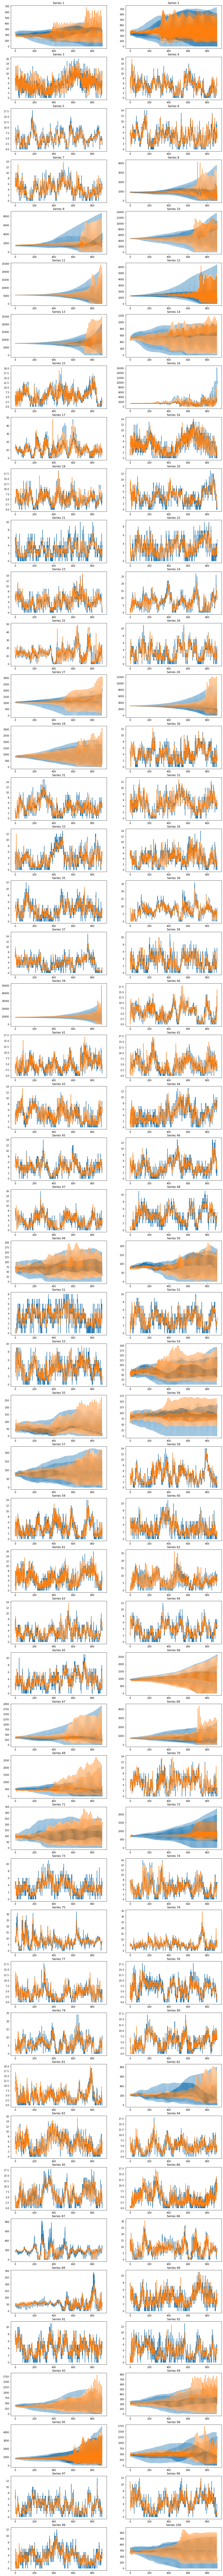

In [6]:
plot_fit(train_data, fitted_values, cols=2)

In [7]:
with open("poisson_autoregression.pkl", "wb") as file:
    pickle.dump(multi_ar_p, file)